In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [9]:
!unzip -q dog_cat_model.zip

In [10]:
loaded_model = keras.models.load_model("dog_cat_model")

In [11]:
url = input("Enter url of the image: ")

Enter url of the image: https://upload.wikimedia.org/wikipedia/commons/d/dc/Young_cats.jpg


In [12]:
import urllib.request

urllib.request.urlretrieve(url, "sample.jpg")

('sample.jpg', <http.client.HTTPMessage at 0x7f171f7d6470>)



--> This image is 72.40 percent cat and 27.60 percent dog.



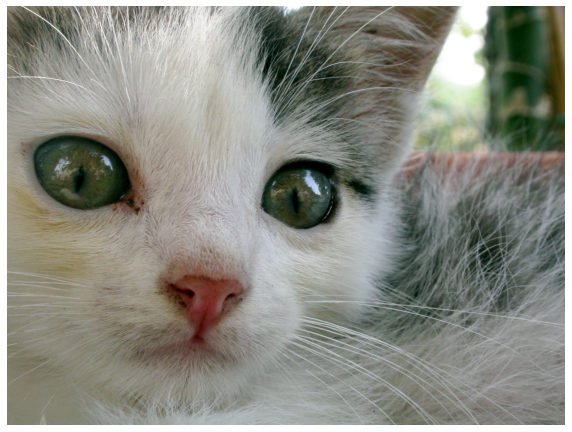

In [15]:
from matplotlib import image
data = image.imread('sample.jpg')
plt.figure(figsize=(10, 10))
plt.imshow(data)
plt.axis('off')

img = keras.preprocessing.image.load_img(
    "sample.jpg", target_size=(180,180)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = loaded_model.predict(img_array)
score = predictions[0]
catPercent = float(100 * (1 - score))
dogPercent = float(100 * score)
print(f'\n\n--> This image is {catPercent:.2f} percent cat and {dogPercent:.2f} percent dog.\n')